In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [20]:
df = pd.read_csv('3-customersatisfaction.csv')

In [21]:
df.head()

,Unnamed: 0,Customer Satisfaction,Incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365


In [22]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Satisfaction  100 non-null    float64
 1   Incentive              100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


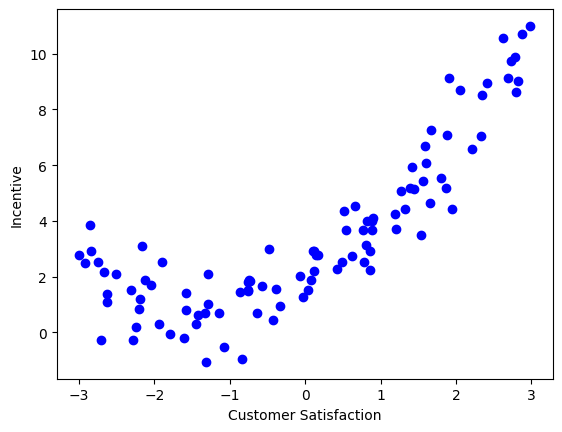

In [24]:
plt.scatter(df['Customer Satisfaction'], df['Incentive'], color="b")
plt.xlabel("Customer Satisfaction")
plt.ylabel("Incentive")
plt.show()

In [25]:
y = df['Incentive']
X = df.drop('Incentive',axis=1)

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=38)

In [30]:
model = LinearRegression()

In [31]:
scaler = StandardScaler()

In [32]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
model.score(X_test,y_test)

0.6663950322563706

In [35]:
y_pred = model.predict(X_test)

In [37]:
score = r2_score(y_test,y_pred)
print(score)

0.6663950322563706


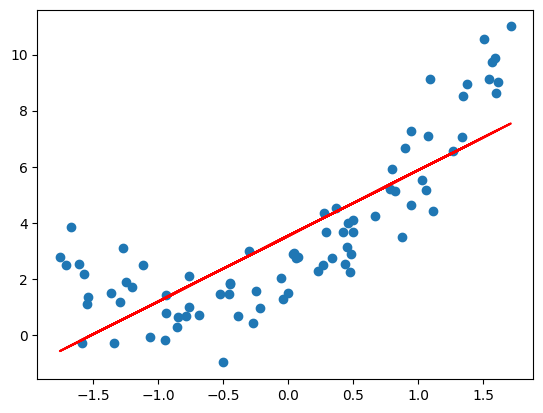

In [38]:
plt.scatter(X_train,y_train)
plt.plot(X_train,model.predict(X_train),color = "r")
plt.show()

In [48]:
poly  = PolynomialFeatures(degree=2,include_bias=True)

In [55]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [56]:
model2 = LinearRegression()
model2.fit(X_train_poly,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [57]:
model2.score(X_test_poly,y_test)

0.9094211406845767

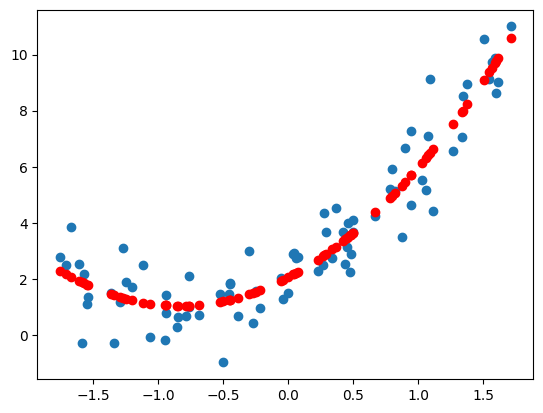

In [59]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, model2.predict(X_train_poly),color = "r")
plt.show()


In [60]:
new_df = pd.read_csv('3-newdatas.csv')

In [61]:
new_df.head()

,0
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397


In [62]:
new_df.rename(columns = {"0": "Customer Satisfaction"},inplace=True)

In [63]:
new_df.head()


,Customer Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397


In [67]:
X_new = new_df[['Customer Satisfaction']]

In [68]:
X_new = scaler.fit_transform(X_new)

In [69]:
X_new_poly = poly.transform(X_new)

In [70]:
y_new = model2.predict(X_new_poly)

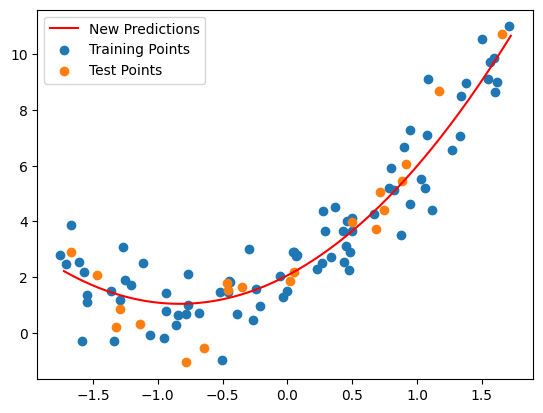

In [73]:
plt.plot(X_new,y_new,"r",label="New Predictions")
plt.scatter(X_train,y_train,label = "Training Points")
plt.scatter(X_test,y_test,label = "Test Points")
plt.legend()
plt.show()

In [80]:
def poly_regression(degree):
    poly_features = PolynomialFeatures(degree=degree)
    lr = LinearRegression()
    scaler = StandardScaler()
    pipeline = Pipeline([
        ("standart_scaler",scaler),
        ("poly_features",poly_features),
        ("lr",lr)
    ])

    pipeline.fit(X_train,y_train)
    score = pipeline.score(X_test,y_test)
    print(score)

    y_pred_new = pipeline.predict(X_new)
    plt.plot(X_new,y_pred_new,"r",label="New Predictions")
    plt.scatter(X_train,y_train,label = "Training Points")
    plt.scatter(X_test,y_test,label = "Test Points")
    plt.legend()
    plt.show()

0.6663950322563705


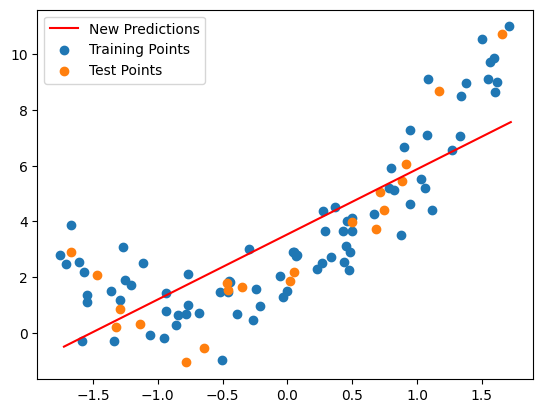

In [81]:
poly_regression(1)

0.9094211406845767


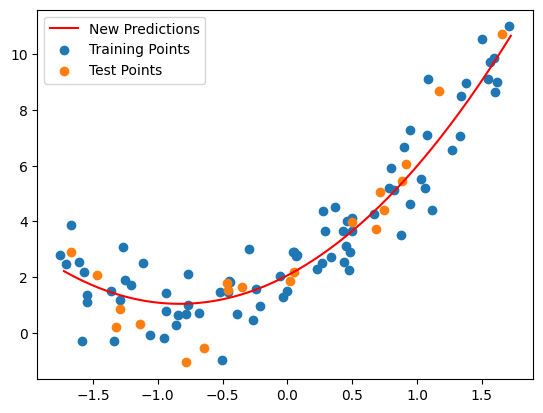

In [82]:
poly_regression(2)

0.9149578101673632


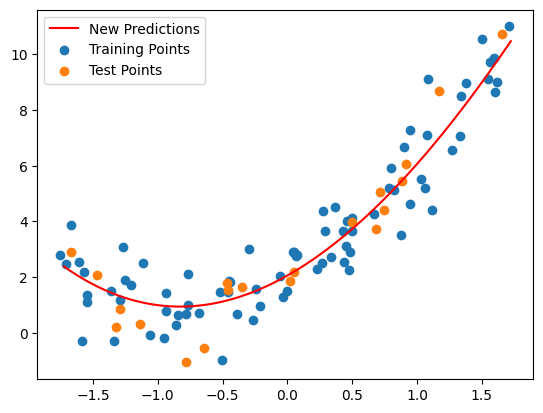

In [83]:
poly_regression(3)